In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [28]:
df_0 = pd.read_csv("/Users/mohammed/Desktop/Machine Learning/PhD Projects/data/csv/run.csv", nrows=1000)

In [ ]:
df_0

,run,subrun,eventtype,incint,negativeke,positionxtpc,positionytpc,positionztpc,decayatrest,beamline_mass,wctrkmomentum,tof,trklength,trkendx,trkendy,trkendz,residualrange,trkdedx,ntrkcalopts,nslice,cke
0,8675,12,m,f,n,0.00,0.00,0.00,n,1082.48,886.56,35.19,31.54,24.11,4.03,35.10,0.00,0.00,69,0,286.72
1,8675,12,m,c,n,24.77,3.06,4.04,n,1082.48,886.56,35.19,31.54,24.11,4.03,35.10,0.22,1.46,69,1,286.05
2,8675,12,m,c,n,24.76,3.08,4.49,n,1082.48,886.56,35.19,31.54,24.11,4.03,35.10,0.67,17.19,69,2,278.19
3,8675,12,m,c,n,24.75,3.09,4.95,n,1082.48,886.56,35.19,31.54,24.11,4.03,35.10,1.12,31.09,69,3,263.98
4,8675,12,m,c,n,24.74,3.11,5.41,n,1082.48,886.56,35.19,31.54,24.11,4.03,35.10,1.57,25.80,69,4,252.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8675,12,p,c,n,1.87,9.62,63.28,n,920.23,793.37,34.15,84.65,1.15,9.69,88.25,25.10,1.81,183,129,137.37
996,8675,12,p,c,n,1.86,9.62,63.74,n,920.23,793.37,34.15,84.65,1.15,9.69,88.25,24.64,1.76,183,130,136.55
997,8675,12,p,c,n,1.84,9.62,64.20,n,920.23,793.37,34.15,84.65,1.15,9.69,88.25,24.18,1.71,183,131,135.76
998,8675,12,p,c,n,1.83,9.62,64.67,n,920.23,793.37,34.15,84.65,1.15,9.69,88.25,23.73,1.95,183,132,134.86


In [33]:
df_0.columns

Index(['run', ' subrun', ' eventtype', ' incint', ' negativeke',
       ' positionxtpc', ' positionytpc', ' positionztpc', ' decayatrest',
       ' beamline_mass', ' wctrkmomentum', ' tof', ' trklength', ' trkendx',
       ' trkendy', ' trkendz', ' residualrange', ' trkdedx', ' ntrkcalopts',
       ' nslice', ' cke'],
      dtype='object')

In [5]:
df = pd.read_csv("/Users/mohammed/Desktop/Machine Learning/PhD Projects/data/csv/run.csv", usecols=[0,1,2,9,11,16,17])

In [34]:
df.columns, df.shape

(Index(['run', ' subrun', ' eventtype', ' beamline_mass', ' tof',
        ' residualrange', ' trkdedx'],
       dtype='object'),
 (72078296, 7))

In [54]:
df["tof"].nunique()

5512

In [44]:
df.columns = df.columns.str.strip()
df.columns

Index(['run', 'subrun', 'eventtype', 'beamline_mass', 'tof', 'residualrange',
       'trkdedx'],
      dtype='object')

In [65]:
grouped_df = df.groupby(["beamline_mass", "tof"]).agg({
    "run": "first",
    "subrun": "first",
    "eventtype": "first",
    "residualrange": list,
    "trkdedx": list,
}).reset_index()

grouped_df

,beamline_mass,tof,run,subrun,eventtype,residualrange,trkdedx
0,-4595.25,18.73,9474,355,None,"[0.0, 0.23, 0.68, 1.13, 1.59, 2.04, 2.5, 2.95,...","[0.0, 4.64, 5.07, 5.49, 5.45, 2.94, 2.43, 1.34..."
1,-3166.80,21.35,8607,135,None,"[0.0, 22.95, 22.55, 22.12, 21.69, 21.28, 20.86...","[0.0, 1.73, 4.02, 2.8, 2.02, 1.8, 1.77, 1.91, ..."
2,-3163.33,21.35,8580,156,None,"[0.0, 49.52, 49.07, 48.62, 48.16, 47.71, 47.26...","[0.0, 3.45, 3.41, 2.26, 2.56, 2.19, 2.07, 2.17..."
3,-2650.58,21.03,8596,280,None,"[0.0, 82.24, 81.79, 81.35, 80.9, 80.45, 80.01,...","[0.0, 1.14, 0.95, 1.13, 1.93, 1.86, 1.21, 1.14..."
4,-2451.50,20.79,8679,1,None,"[0.0, 0.23, 0.68, 1.13, 1.58, 2.03, 2.48, 2.94...","[0.0, 13.32, 7.2, 4.05, 1.81, 3.64, 1.8, 1.87,..."
...,...,...,...,...,...,...,...
528277,13062.01,40.36,8679,352,None,"[0.0, 83.4, 82.96, 82.53, 82.1, 80.8, 80.37, 7...","[0.0, 0.26, 0.27, 0.28, 0.26, 0.28, 0.27, 0.31..."
528278,14085.15,32.23,9540,142,m,"[0.0, 0.23, 0.68, 1.14, 1.6, 2.05, 2.51, 2.97,...","[0.0, 3.96, 4.58, 3.74, 3.59, 1.55, 4.23, 1.78..."
528279,16778.80,99.03,9447,373,None,"[0.0, 84.49, 84.05, 83.61, 83.17, 82.72, 82.28...","[0.0, 1.57, 2.05, 1.68, 1.52, 1.75, 1.55, 1.36..."
528280,18161.64,76.89,9762,362,None,"[0.0, 0.24, 0.71, 1.16, 1.63, 2.09, 2.56, 3.02...","[0.0, 2.82, 1.84, 3.95, 2.32, 1.11, 3.36, 1.48..."


In [66]:
beamlinemass = grouped_df[(grouped_df['beamline_mass'] > 0)]['beamline_mass']

In [67]:
tof = grouped_df[(grouped_df['beamline_mass'] > 0)]['tof']

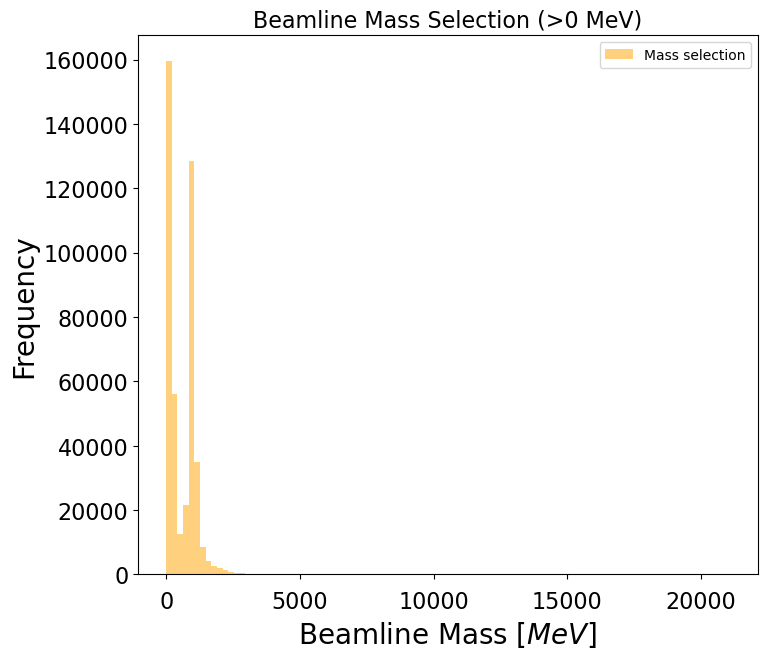

In [68]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    beamlinemass,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(0, max(beamlinemass)),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Mass selection'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (>0 MeV)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

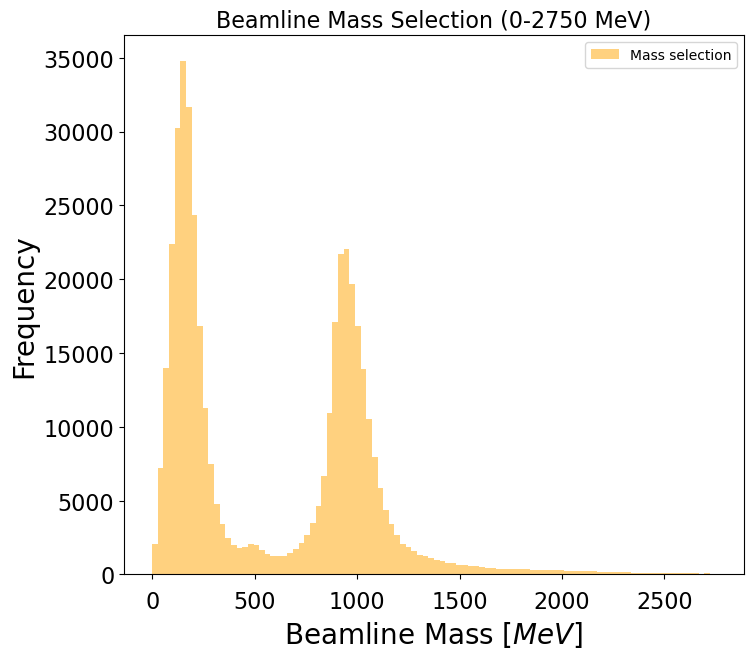

In [69]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    beamlinemass,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(0, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Mass selection'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (0-2750 MeV)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

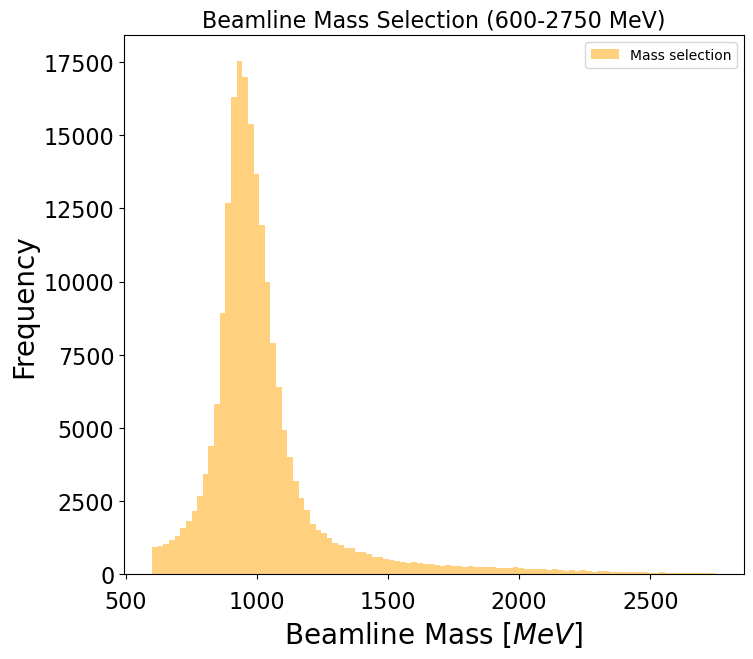

In [70]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    beamlinemass,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Mass selection'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

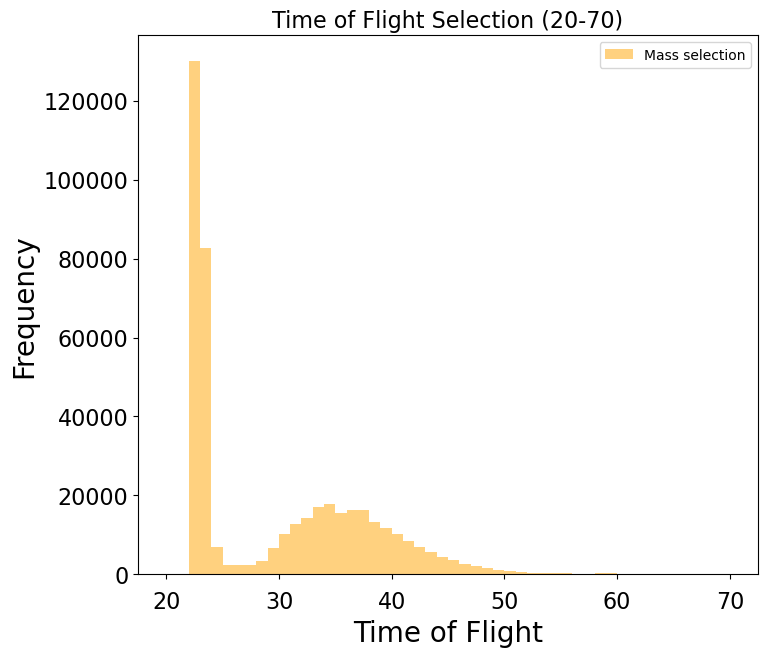

In [71]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    tof,  # Data to plot
    bins=50,  # Number of bins
    color='orange',  # Bar color
    range=(20, 70),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Mass selection'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Time of Flight', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Time of Flight Selection (20-70)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [72]:
# picky tracks 
# golden sample for protons 
# cleaning up duplicate
# event displays 

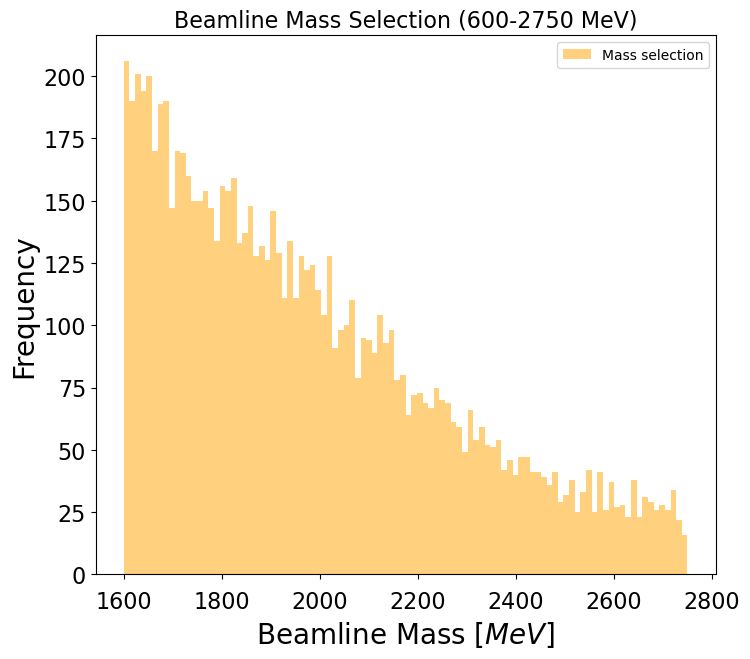

In [73]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    beamlinemass,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(1600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Mass selection'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [79]:
beamlinemass_mp = grouped_df[(grouped_df['eventtype'] == 'pm')]['beamline_mass']

In [81]:
beamlinemass_mp[beamlinemass_mp > 1600].count()

55

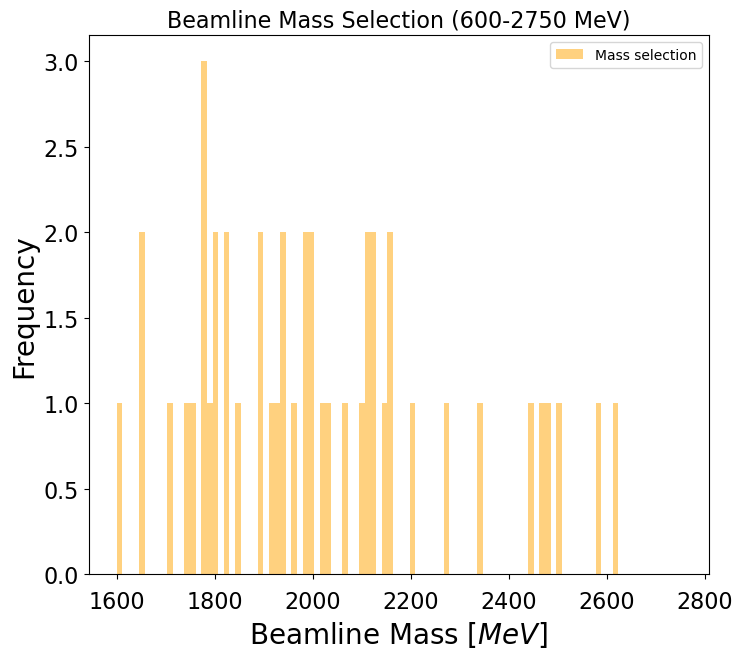

In [76]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    beamlinemass_mp,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(1600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Mass selection'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()